# Dataset Acquisition

In [ ]:
## Import required packages

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

In [ ]:
import cv2

In [ ]:
## Dataset Loading

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
## Dataset shape
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

# Data Exploration

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
## Converting to one dimension
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

None
None
None


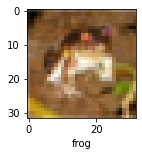

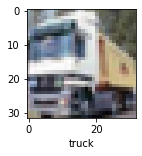

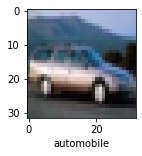

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])
print(plot_sample(x_train,y_train,0))
print(plot_sample(x_train,y_train,1))
print(plot_sample(x_train,y_train,4))

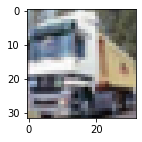

In [ ]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[1])

# Dataset Pre-Processing

In [ ]:
## Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
## Train dataset resize to 2D array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [ ]:
## Test dataset resize to 2D array
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

# Implementing a Random Forest Classifier

In [ ]:
## Import from sklearn
from sklearn.ensemble import RandomForestClassifier

In [ ]:
## Creating instance of the randomforestclassifier
rfc=RandomForestClassifier()

In [ ]:
## Train the model
rfc.fit(x_train2,y_train)

RandomForestClassifier()

In [ ]:
## Prediction for the test set using the random forest classification model
y_pred=rfc.predict(x_test2)
y_pred

array([2, 8, 8, ..., 5, 5, 7], dtype=uint8)

In [ ]:
## Classification report, confusion matrix and accuracy score
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.55      0.53      0.54      1033
           1       0.55      0.52      0.53      1063
           2       0.33      0.37      0.35       890
           3       0.28      0.34      0.31       837
           4       0.39      0.39      0.39       986
           5       0.39      0.42      0.41       925
           6       0.58      0.48      0.53      1194
           7       0.46      0.52      0.49       875
           8       0.60      0.57      0.58      1060
           9       0.54      0.48      0.51      1137

    accuracy                           0.47     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.48      0.47      0.47     10000



In [ ]:
confusion_matrix(y_pred,y_test)

array([[547,  32, 103,  53,  59,  33,  12,  45,  97,  52],
       [ 38, 548,  44,  49,  24,  33,  35,  43,  93, 156],
       [ 64,  17, 328,  72, 154,  92,  74,  55,  19,  15],
       [ 17,  32,  86, 282,  58, 172,  59,  59,  34,  38],
       [ 34,  27, 152,  67, 385,  66, 112,  95,  19,  29],
       [ 25,  26,  64, 183,  47, 390,  57,  85,  30,  18],
       [ 24,  41, 114, 138, 149,  77, 576,  47,   9,  19],
       [ 18,  38,  59,  64,  74,  79,  24, 459,  19,  41],
       [172,  64,  26,  24,  26,  26,   7,  24, 601,  90],
       [ 61, 175,  24,  68,  24,  32,  44,  88,  79, 542]])

# Implementing a KNN

In [ ]:
## Import KNeighborsClassifier class
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
## Create a knn model
knn=KNeighborsClassifier(n_neighbors=7)

In [ ]:
## Training the model
knn.fit(x_train2,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
## Predicting the test 
y_pred_knn=knn.predict(x_test2)
y_pred_knn

array([2, 8, 8, ..., 5, 6, 4], dtype=uint8)

In [ ]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45      1299
           1       0.20      0.70      0.30       280
           2       0.44      0.22      0.29      2013
           3       0.20      0.28      0.23       707
           4       0.52      0.23      0.32      2222
           5       0.20      0.40      0.27       504
           6       0.27      0.35      0.30       761
           7       0.20      0.70      0.31       281
           8       0.69      0.39      0.50      1749
           9       0.14      0.73      0.23       184

    accuracy                           0.34     10000
   macro avg       0.34      0.44      0.32     10000
weighted avg       0.45      0.34      0.35     10000



In [ ]:
confusion_matrix(y_pred_knn,y_test)

array([[518, 118, 110,  66,  60,  63,  22,  78, 112, 152],
       [  7, 195,   2,   5,   0,   2,   1,   8,  10,  50],
       [118, 124, 437, 243, 268, 225, 271, 185,  47,  95],
       [ 12,  51,  50, 199,  33, 156,  56,  57,  34,  59],
       [ 46, 173, 250, 214, 521, 201, 319, 294,  69, 135],
       [  5,  32,  24, 102,  14, 204,  32,  60,  12,  19],
       [ 30,  55,  65, 108,  44,  80, 265,  48,  14,  52],
       [  5,   8,   7,  11,  11,  10,   1, 196,   7,  25],
       [255, 223,  53,  51,  48,  53,  32,  68, 688, 278],
       [  4,  21,   2,   1,   1,   6,   1,   6,   7, 135]])

# Implementing a Decision Tree classifier

In [ ]:
## Import decisiontreeclassifier class
from sklearn.tree import DecisionTreeClassifier

In [ ]:
## Create decisiontreeclassifier model
dtc=DecisionTreeClassifier()

In [ ]:
## Train the model
dtc.fit(x_train2,y_train)

DecisionTreeClassifier()

In [ ]:
## Predict the test using the fitted decision tree model
y_pred_dtc=dtc.predict(x_test2)
y_pred_dtc

array([7, 1, 9, ..., 2, 2, 5], dtype=uint8)

In [ ]:
accuracy_score(y_pred_dtc,y_test)
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.35      0.32      0.34      1086
           1       0.27      0.28      0.27       938
           2       0.23      0.21      0.22      1077
           3       0.18      0.18      0.18       963
           4       0.23      0.22      0.22      1039
           5       0.20      0.21      0.21       954
           6       0.28      0.28      0.28      1003
           7       0.26      0.28      0.27       949
           8       0.37      0.37      0.37      1021
           9       0.29      0.30      0.29       970

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000



In [ ]:
confusion_matrix(y_pred_dtc,y_test)

array([[350,  73,  98,  78,  54,  59,  41,  84, 154,  95],
       [ 73, 266,  43,  52,  48,  63,  39,  76, 108, 170],
       [ 85,  72, 228, 112, 157, 112, 123,  89,  41,  58],
       [ 62,  71, 101, 178,  84, 152, 128,  84,  49,  54],
       [ 65,  68, 138, 108, 228,  93, 145, 101,  46,  47],
       [ 45,  52, 111, 125, 102, 205,  97, 107,  56,  54],
       [ 43,  63, 106, 143, 129, 102, 278,  54,  32,  53],
       [ 49,  61,  77,  97, 112,  99,  78, 263,  35,  78],
       [157, 111,  45,  47,  37,  56,  30,  62, 373, 103],
       [ 71, 163,  53,  60,  49,  59,  41,  80, 106, 288]])

# Implementing a Naive Bayes classifier

In [ ]:
## Import naive bayes classifier class
from sklearn.naive_bayes import GaussianNB

In [ ]:
## Creating NB model
nb=GaussianNB()

In [ ]:
## Train the model
nb.fit(x_train2,y_train)

GaussianNB()

In [ ]:
## Predict the test set using fitted NB model
y_pred_nb=nb.predict(x_test2)
y_pred_nb

array([6, 8, 8, ..., 6, 5, 4], dtype=uint8)

In [ ]:
accuracy_score(y_pred_nb,y_test)
print(classification_report(y_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.49      0.27      0.35      1817
           1       0.17      0.41      0.24       405
           2       0.08      0.19      0.12       443
           3       0.08      0.25      0.12       305
           4       0.42      0.24      0.30      1737
           5       0.26      0.31      0.29       840
           6       0.47      0.25      0.33      1846
           7       0.13      0.42      0.20       310
           8       0.47      0.39      0.42      1219
           9       0.41      0.38      0.39      1078

    accuracy                           0.30     10000
   macro avg       0.30      0.31      0.28     10000
weighted avg       0.39      0.30      0.32     10000



In [ ]:
confusion_matrix(y_pred_nb,y_test)

array([[494, 141, 225, 163,  86, 156, 106, 134, 168, 144],
       [ 20, 166,  24,  36,   8,  17,   2,  24,  41,  67],
       [ 39,  24,  83,  54,  57,  55,  60,  36,  18,  17],
       [ 10,  31,  15,  76,  26,  51,  18,  41,  17,  20],
       [ 84,  66, 292, 151, 417, 167, 228, 228,  56,  48],
       [ 34,  72,  48, 129,  38, 264,  46,  94,  83,  32],
       [ 50, 192, 209, 262, 265, 159, 467, 102,  39, 101],
       [  9,  19,  21,  26,  22,  36,  15, 131,   8,  23],
       [200, 121,  54,  34,  50,  57,  19,  72, 471, 141],
       [ 60, 168,  29,  69,  31,  38,  39, 138,  99, 407]])

# Implementing a ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
## Artificial Neural Network
ann=models.Sequential([
                       layers.Flatten(input_shape=(32,32,3)),
                       layers.Dense(3000,activation='relu'),
                       layers.Dense(1000,activation='relu'),
                       layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.8130 - accuracy: 0.3565
Epoch 2/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.6246 - accuracy: 0.4270
Epoch 3/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.5416 - accuracy: 0.4544
Epoch 4/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4816 - accuracy: 0.4772
Epoch 5/5
1563/1563 [==============================] - 99s 64ms/step - loss: 1.4321 - accuracy: 0.4966


In [ ]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 8s 24ms/step - loss: 1.4687 - accuracy: 0.4872


[1.4687222242355347, 0.487199991941452]

In [ ]:
## Predict the test set using fitted NB model
y_pred_ann=ann.predict(x_test)
y_pred_ann_classes=[np.argmax(element) for element in y_pred_ann]

In [ ]:
print(accuracy_score(y_pred_ann_classes,y_test))
print(classification_report(y_test,y_pred_ann_classes))

0.4872
              precision    recall  f1-score   support

           0       0.63      0.51      0.56      1000
           1       0.53      0.71      0.61      1000
           2       0.49      0.13      0.21      1000
           3       0.32      0.47      0.38      1000
           4       0.50      0.34      0.41      1000
           5       0.40      0.38      0.39      1000
           6       0.43      0.70      0.53      1000
           7       0.49      0.60      0.54      1000
           8       0.69      0.54      0.61      1000
           9       0.59      0.49      0.53      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.48     10000
weighted avg       0.51      0.49      0.48     10000



In [ ]:
confusion_matrix(y_pred_ann_classes,y_test)

array([[507,  16,  65,  13,  36,  13,   3,  19, 104,  27],
       [ 71, 712,  35,  24,  23,  20,  20,  33, 129, 270],
       [ 24,   2, 132,  16,  36,  19,  11,  18,  11,   2],
       [ 78,  45, 182, 470, 112, 260, 111, 103,  59,  59],
       [ 22,   8, 130,  26, 345,  38,  60,  41,  17,   7],
       [ 30,  21, 107, 174,  69, 376,  43,  73,  33,  23],
       [ 47,  23, 211, 157, 223, 143, 697,  60,  21,  40],
       [ 67,  40, 105,  72, 131,  95,  36, 604,  30,  50],
       [104,  32,  17,  13,  15,  15,   7,   4, 537,  30],
       [ 50, 101,  16,  35,  10,  21,  12,  45,  59, 492]])

# Implementing a CNN

In [ ]:
# baseline model with dropout and data augmentation on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [ ]:
# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [ ]:
# scale pixels
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX/255.0
testX = testX/255.0

In [ ]:
num_classes=10

In [ ]:
# define cnn model
cnn = Sequential()
cnn.add(Conv2D(48, kernel_size = 3, activation="relu", padding="same", input_shape=(32, 32, 3)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(48, kernel_size = 3, activation="relu", padding="same"))
cnn.add(BatchNormalization())
cnn.add(Conv2D(48, kernel_size = 5, activation="relu", padding="same", strides=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Conv2D(64, kernel_size = 3, activation="relu", padding="same"))
cnn.add(BatchNormalization())
cnn.add(Conv2D(64, kernel_size = 3, activation="relu", padding="same"))
cnn.add(BatchNormalization())
cnn.add(Conv2D(64, kernel_size = 5, activation="relu", padding="same", strides=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.3))

cnn.add(Conv2D(128, kernel_size = 3, activation="relu", padding="same"))
cnn.add(BatchNormalization())
cnn.add(Conv2D(128, kernel_size = 3, activation="relu", padding="same"))
cnn.add(BatchNormalization())
cnn.add(Conv2D(128, kernel_size = 5, activation="relu", padding="same", strides=2))
cnn.add(Dropout(0.4))

cnn.add(Conv2D(256, kernel_size = 4, activation="relu", padding="same"))
cnn.add(Flatten())
cnn.add(Dropout(0.5))

cnn.add(Dense(num_classes, activation="softmax"))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
cnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# run the test harness for evaluating a model
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
steps = int(trainX.shape[0]/64)

In [ ]:
cnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 48)        1344      
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 48)       192       
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 48)        20784     
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 48)       192       
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 48)        57648     
                                                                 
 batch_normalization_7 (Batc  (None, 16, 16, 48)     

In [ ]:
history = cnn.fit(it_train, steps_per_epoch=steps, epochs=20, validation_data=(testX, testY), verbose=1)
history

Epoch 1/20
781/781 [==============================] - 957s 1s/step - loss: 1.8145 - accuracy: 0.3265 - val_loss: 1.4843 - val_accuracy: 0.4554
Epoch 2/20
781/781 [==============================] - 952s 1s/step - loss: 1.4837 - accuracy: 0.4519 - val_loss: 1.4928 - val_accuracy: 0.4636
Epoch 3/20
781/781 [==============================] - 949s 1s/step - loss: 1.3333 - accuracy: 0.5139 - val_loss: 1.1380 - val_accuracy: 0.5884
Epoch 4/20
781/781 [==============================] - 963s 1s/step - loss: 1.2123 - accuracy: 0.5615 - val_loss: 1.2019 - val_accuracy: 0.5697
Epoch 5/20
781/781 [==============================] - 964s 1s/step - loss: 1.1094 - accuracy: 0.6007 - val_loss: 1.1698 - val_accuracy: 0.5908
Epoch 6/20
781/781 [==============================] - 966s 1s/step - loss: 1.0365 - accuracy: 0.6291 - val_loss: 1.0301 - val_accuracy: 0.6317
Epoch 7/20
781/781 [==============================] - 966s 1s/step - loss: 0.9721 - accuracy: 0.6543 - val_loss: 0.9943 - val_accuracy: 0.6449

In [ ]:
# evaluate model
_, acc = cnn.evaluate(testX, testY, verbose=1)
print('> %.3f'%(acc*100.0))
cnn.save('model.h5')

313/313 [==============================] - 48s 152ms/step - loss: 0.6915 - accuracy: 0.7686
> 76.860


In [ ]:
# plot diagnostic learning curves
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
# save plot to file
filename = sys.argv[0].split('/')[-1]
pyplot.savefig(filename + '_plot.png')
pyplot.close()

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image("/content/pexels-roshan-kamath-1661179.jpg")
	# load model
	model = load_model('model.h5')
	# predict the class
	result = model.predict(img)
  # classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
	print(result[0])
 
# entry point, run the example
run_example()

[2.7144713e-05 3.1272989e-06 5.3823706e-02 9.7827637e-04 4.1804227e-04
 1.5023201e-04 9.4457650e-01 8.2670003e-06 1.9883591e-06 1.2743964e-05]


# Results

[]

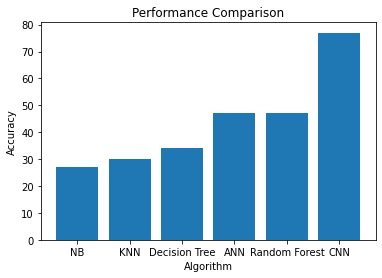

In [ ]:
## Comparison between different models
x=['NB','KNN','Decision Tree','ANN','Random Forest','CNN']
y=[27,30,34,47,47,77]
plt.title('Performance Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.bar(x,y)
plt.plot()

# Conclusion

In [ ]:
""" We implemented four popular ML methods, including Random Forest, KNN, Decision Tree, Naive Bayes classifier and ANN
to discuss how to apply picture classification in machine learning. Deep learning(CNN) is preferred for image classification jobs 
due to the low accuracy of traditional methods. """